In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  True
OS:  linux


In [2]:
ms=[0,0.5,0.98]
#wds=[0]
sch="plateau"
total_epochs=160
step=40
bs=128
wd=5e-5

def train_prog():
    print("Step: " + str(1))
    name="adam_"+"bs_"+str(bs) 
    
    save_folder=name+"/"+name
    net=models.resnet18(num_classes=10)
    criterion = nn.CrossEntropyLoss()

    #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=m, weight_decay=wd)
    optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

    if sch=="cosine":
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
    elif sch=="plateau":
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
    elif sch=="exp":
        # Decay LR by a factor of 0.1 every 7 epochs
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    model_actions.progressive_train_4(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)



In [3]:
az_manage_proc.run_and_delete(log.log_time,train_prog)

Found existing instance, use it.
Logging time
Step: 1
Training


Epoch: 1
Saving best..

Epoch: 2
Saving best..

Epoch: 3
Saving best..

Epoch: 4
Saving best..

Epoch: 5
Saving best..

Epoch: 6
Saving best..

Epoch: 7
Saving best..

Epoch: 8
Saving best..

Epoch: 9

Epoch: 10
Saving best..

Epoch: 11

Epoch: 12
Saving best..

Epoch: 13

Epoch: 14
Saving best..

Epoch: 15
Saving best..

Epoch: 16
Saving best..

Epoch: 17

Epoch: 18
Saving best..

Epoch: 19

Epoch: 20
Saving best..

Epoch: 21
Saving best..

Epoch: 22


In [3]:
#Training for different weight decays, with weight statistics: ws

wds=[0,5e-7,5e-5,5e-3,5e-1]
#wds=[0]
sch="plateau"
total_epochs=100
step=20
bs=128

def train_prog_wd():
    for wd in wds:
        print("Step: " + str(wd))

        name="rmsprop"+"_wd_" + str(wd)
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=wd)
        #optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
        optimizer=torch.optim.RMSprop(net.parameters(), lr=0.1, alpha=0.99, eps=1e-08, weight_decay=wd, momentum=0, centered=False)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        #plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        if sch=="cosine":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
        elif sch=="plateau":
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

        model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [4]:
#Training for different weight decays, with weight statistics: ws

alphas=[0,0.3,0.6,0.9]
#wds=[0]
sch="plateau"
total_epochs=100
step=20
bs=128
wd=5e-5

def train_prog_alpha():
    for alpha in alphas:
        print("Step: " + str(alpha))

        name="rmsprop"+"_alpha_" + str(alpha)
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=wd)
        #optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
        optimizer=torch.optim.RMSprop(net.parameters(), lr=0.1, alpha=alpha, eps=1e-08, weight_decay=wd, momentum=0, centered=False)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        #plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        if sch=="cosine":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
        elif sch=="plateau":
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

        model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [5]:
def both_wd_and_alpha():
    train_prog_wd()
    train_prog_alpha()

In [6]:
az_manage_proc.run_and_delete(log.log_time,both_wd_and_alpha)

Found existing instance, use it.
Logging time
Step: 0
Training


Epoch: 1
Saving best..

Epoch: 2

Epoch: 3
Saving best..

Epoch: 4
Saving best..

Epoch: 5
Saving best..

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10
Saving best..

Epoch: 11
Saving best..

Epoch: 12
Saving best..

Epoch: 13
Saving best..

Epoch: 14

Epoch: 15

Epoch: 16

Epoch: 17

Epoch: 18
Saving best..

Epoch: 19

Epoch: 20
Saving step..

Epoch: 21
Saving best..

Epoch: 22
Saving best..

Epoch: 23


# Graphs

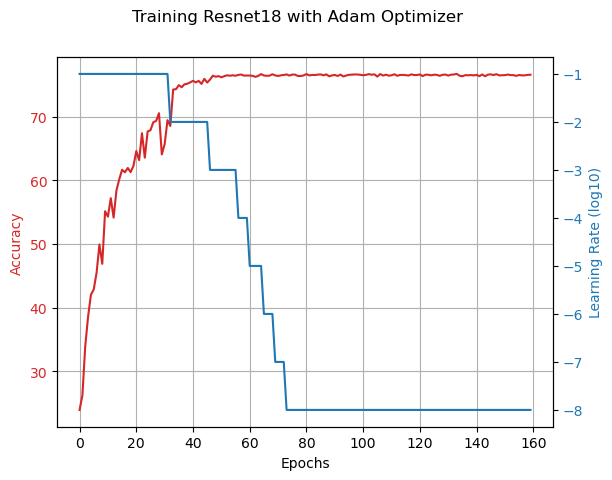

In [6]:
bs=128
m=0.5
loaded=utils.load("adam_"+"bs_"+str(bs)+".json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Learning Rate (log10)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log10(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle("Training Resnet18 with Adam Optimizer")

plt.show()

In [5]:
bs=128
m=0.5
loaded=utils.load("adam_"+"bs_"+str(bs)+".json")
print(max(loaded["test_acc_v"]))

76.75


In [ ]:
wd=5e-7
loaded_meta=model_actions.load_meta("./checkpoints/bs_128_sch_plateau_wd_"+str(wd)+"/bs_128_sch_plateau_wd_"+str(wd)+"_epoch_137")

In [27]:
loaded_meta["best_acc"]

84.52